## Homework 2
### Due: Thursday Feb. 13

**Integer vs floating point number**

Write a program to calculate and print the factorial of a
number.  If you wish you can base your program on the
user-defined function for factorial given in Section 2.6, but write your
program so that it calculates the factorial using *integer*
variables, not floating-point ones.  Use your program to calculate the
factorial of 200.

Now modify your program to use floating-point variables instead and again
calculate the factorial of 200.  What do you find?  Explain.

(20 points)

In [1]:
# code
# import math <- never do this, numpy > math

# Trial using intergers only
def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

print("Factorial of 200 when interger-only values are allowed:", factorial(200))  

# Trial for floating-point variables
def factorial_new(n):
    result = 1.0
    for i in range(1, n + 1):  
        result *= i
    return result

print("Factorial of 200 when floating-point variables are allowed:", factorial_new(200))


Factorial of 200 when interger-only values are allowed: 788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000
Factorial of 200 when floating-point variables are allowed: inf


**Explanation:** The first trial using interger-only values is able to calculate a value because Python somehow knows how to store that many digits in an integer output; however, when we attempt to run code that allows floating-point values the digit count exceeds Python's storing capacity and it gives "inf" as the output. 

**A Simple Derivative**

Suppose we have a function $f(x)$ and we want to
calculate its derivative at a point $x$.  We can do that with pencil and
paper if we know the mathematical form of the function, or we can do it on
the computer by making use of the definition of the derivative:

<p style="text-align:center;">
${d f\over d x} = \lim_{\delta\to0} {f(x+\delta)-f(x)\over\delta}.$
</p>

On the computer we can't actually take the limit as $\delta$ goes to
zero, but we can get a reasonable approximation just by making $\delta$
small.
- Write a program that defines a function *f(x)* returning the
  value $x(x-1)$, then calculates the derivative of the function at the
  point $x=1$ using the formula above with $\delta=10^{-2}$.  Calculate
  the true value of the same derivative analytically and compare with the
  answer your program gives.  The two will not agree perfectly.  Why not?
- Repeat the calculation for $\delta=10^{-4}$, $10^{-6}$, $10^{-8}$,
  $10^{-10}$, $10^{-12}$, and $10^{-14}$.  You should see that the accuracy
  of the calculation initially gets better as $\delta$ gets smaller, but
  then gets worse again.  Why is this?

(20 points)

In [2]:
# code
import numpy as np

# Derivative of x(x-1) is 2x - 1, at x=1 the answer is 1 
true_value = 1

# Define the function f(x)
def f(x):
    return x * (x - 1)

# Define x
x_point = 1

# Compute derivative numerically
def numerical_derivative(x, delta):
    return (f(x + delta) - f(x)) / delta

# Different values of delta
deltas = [10**-2, 10**-4, 10**-6, 10**-8, 10**-10, 10**-12, 10**-14]

# Run loop over different delta values and calculate errors
print(f"{'Delta':<12}{'Numerical Derivative':<25}{'Error'}")
for delta in deltas:
    num_value = numerical_derivative(x_point, delta)
    error = abs(num_value - true_value)
    print(f"{delta:<12}{num_value:<25}{error}")

Delta       Numerical Derivative     Error
0.01        1.010000000000001        0.010000000000000897
0.0001      1.0000999999998899       9.999999988985486e-05
1e-06       1.0000009999177333       9.99917733279787e-07
1e-08       1.0000000039225287       3.922528746258536e-09
1e-10       1.000000082840371        8.284037100736441e-08
1e-12       1.0000889005833413       8.890058334132256e-05
1e-14       0.9992007221626509       0.0007992778373491216


### Simpson's Rule

- Write a program to calculate an approximate value for the integral $\int_{0}^{2} ( x^4 - 2x + 1)dx$ from Example 5.1 in the book, but using Simpson's rule with 10 slices instead of the trapezoid rule. You may be able to modify your code from the trapezoid rule to complete this task. Compare your result to the known correct value of 4.4. What is the fractional error on your calculation?

- Copy your code and modify it to use one hundred slices, then one thousand. Note the improvement in the result and compare to the results from the trapezoid rule.

(30 points)

In [3]:
# Simpson's Rule with N = 10

import numpy as np
import matplotlib.pyplot as plt

# Define Simpson's Rule
def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # important: n has to be even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * sum(y[1:n:2]) + 2 * sum(y[2:n-1:2]) + y[n])

# Define f(x)
def f(x):
    return x**4 - 2*x + 1

# Set bounds
a, b = 0, 2

# Calculate values
n = 10
result_10 = simpsons_rule(f, a, b, n)
fractional_error_10 = abs((result_10 - 4.4) / 4.4)
print(f"Simpson's Rule with {n} slices: {result_10:.6f}, Fractional Error: {fractional_error_10:.6e}")

Simpson's Rule with 10 slices: 4.400427, Fractional Error: 9.696970e-05


In [4]:
# Simpson's Rule with N = 100

import numpy as np
import matplotlib.pyplot as plt


# Define Simpson's Rule
def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # important: n has to be even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * sum(y[1:n:2]) + 2 * sum(y[2:n-1:2]) + y[n])

# Define f(x)
def f(x):
    return x**4 - 2*x + 1

# Set bounds
a, b = 0, 2

# Calculate values
n = 100
result_100 = simpsons_rule(f, a, b, n)
fractional_error_100 = abs((result_100 - 4.4) / 4.4)
print(f"Simpson's Rule with {n} slices: {result_100:.6f}, Fractional Error: {fractional_error_100:.6e}")

Simpson's Rule with 100 slices: 4.400000, Fractional Error: 9.696970e-09


In [5]:
# Simpson's Rule with N = 1000

import numpy as np
import matplotlib.pyplot as plt

# Define Simpson's Rule
def simpsons_rule(f, a, b, n):
    if n % 2 == 1:
        n += 1  # important: n has to be even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * sum(y[1:n:2]) + 2 * sum(y[2:n-1:2]) + y[n])

# Define f(x)
def f(x):
    return x**4 - 2*x + 1

# Set bounds
a, b = 0, 2

# Calculate values
n = 1000
result_1000 = simpsons_rule(f, a, b, n)
fractional_error_1000 = abs((result_1000 - 4.4) / 4.4)
print(f"Simpson's Rule with {n} slices: {result_1000:.6f}, Fractional Error: {fractional_error_1000:.6e}")

Simpson's Rule with 1000 slices: 4.400000, Fractional Error: 9.697293e-13


**Comparison:** As the number of slices increases by a factor of 10 the fractional error decreases dramatically. 

### An Integral With No Analytic Solution

Consider the integral

$$ E(x) = \int_{0}^{x} \exp{-t^2} dt$$

- Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices.

- When you are convinced your program is working, extend it further to make a graph of E(x) as a function of x.

(30 points)

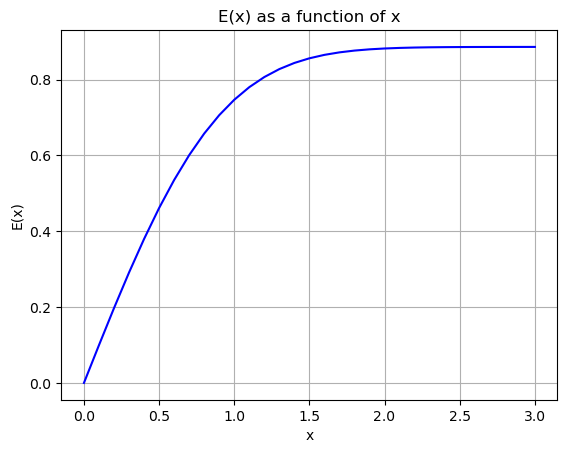

In [6]:
# Trapeziodal rule for integrating 

import numpy as np
import matplotlib.pyplot as plt

# Define trapezoidal rule with integral E(x)
def E(x, n=1000):
    t_values = np.linspace(0, x, n)     
    f_values = np.exp(-t_values**2)     
    dx = x / (n - 1)                    
    return np.trapz(f_values, dx=dx)  

x_values = np.arange(0, 3.1, 0.1)
E_values = [E(x) for x in x_values]

plt.plot(x_values, E_values, color='b')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.title('E(x) as a function of x')
plt.grid()
plt.show()